# <font color='yellow'> <center>Hackathon 2024</center></font>

## Importación y tratamiento de los datos
Primero se importa el modelo desde el csv a un arreglo de pandas

In [97]:
import pandas as pd

In [107]:
df = pd.read_csv("Sistecrédito/Dataset_masked.csv")
print(df.shape[0])

1744667


Luego, se clasificarán las columnas con valores de texto

In [108]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
categorical_columns = ['CreditoCodigo', 'PersonaCodigo', 'DepartamentoResidencia', 'DepartamentoMayorFrecuenciaCompra',
                       'AlmacenMayorFrecuenciaPagoCodigo', 'AlmacenCreditoCodigo', 'AlmacenPerfilCodigo', 'DepartamentoCredito',
                       'storeIdEventoA', 'EventoA', 'userIdEventoB', 'RazonSocialUsuarioEventoB', 
                       'LocalizacionComercioCredito', 'StatusComercioCredito', 'TipoAlmacenCredito', 'TipoCliente']

for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column].astype(str))

Ahora, el tratamiento de las columnas con fecha

In [109]:
df['FechaCreacion'] = pd.to_datetime(df['FechaCreacion']).astype('int64') // 10**9
df['FechaEventoA'] = pd.to_datetime(df['FechaEventoA']).astype('int64') // 10**9
df['FechaEventoB'] = pd.to_datetime(df['FechaEventoB']).astype('int64') // 10**9

La columna de Geolocalización se divide en Latitud y Longitud

In [110]:
df[['Latitud', 'Longitud']] = df['LocalizacionEventoB'].str.strip("[]").str.split(",", expand=True).astype(float)
df = df.drop(columns=['LocalizacionEventoB'])

Tratamiento de datos nulos

In [113]:
#df.fillna(df.mean())
df.fillna(-1, inplace=True)
#df.dropna()

count = df.isnull().sum()
count

CreditoCodigo                        0
PersonaCodigo                        0
DepartamentoResidencia               0
DepartamentoMayorFrecuenciaCompra    0
AlmacenMayorFrecuenciaPagoCodigo     0
ValorPagosUltMes                     0
AlmacenCreditoCodigo                 0
AlmacenPerfilCodigo                  0
DepartamentoCredito                  0
FechaCreacion                        0
ValorFactura                         0
CupoTotal                            0
CupoDisponibleTotal                  0
storeIdEventoA                       0
FechaEventoA                         0
EventoA                              0
FechaEventoB                         0
userIdEventoB                        0
RazonSocialUsuarioEventoB            0
LocalizacionComercioCredito          0
StatusComercioCredito                0
FrecuenciaCreditosSemana             0
CantidadCreditosUltimaSemana         0
ValorAtipicoCliente                  0
ValorAtipicoComercio                 0
TipoAlmacenCredito       

La variable objetivo se elimina del dataset para el entrenamiento del modelo

In [114]:
X = df.drop(columns=["Atipico"])
y = df["Atipico"]

El dataset quedó así:

In [115]:
df

,CreditoCodigo,PersonaCodigo,DepartamentoResidencia,DepartamentoMayorFrecuenciaCompra,AlmacenMayorFrecuenciaPagoCodigo,ValorPagosUltMes,AlmacenCreditoCodigo,AlmacenPerfilCodigo,DepartamentoCredito,FechaCreacion,...,StatusComercioCredito,FrecuenciaCreditosSemana,CantidadCreditosUltimaSemana,ValorAtipicoCliente,ValorAtipicoComercio,TipoAlmacenCredito,TipoCliente,Atipico,Latitud,Longitud
0,104,195241,21,28,2470,86923.0,22341,0,28,1255132800,...,2,1.0,3,350140.0,563000.0,1,0,0,-1.000000,-1.000000
1,32,620995,28,28,1402,45347.0,9565,0,28,1126483200,...,0,1.0,4,579000.0,499553.0,1,0,0,-1.000000,-1.000000
2,173,159048,1,28,6357,10113443.0,32304,0,28,1198470948,...,2,-1.0,10,-1.0,-1.0,1,0,0,-1.000000,-1.000000
3,174,159048,1,28,6357,10113443.0,18710,0,28,1197520548,...,2,-1.0,10,-1.0,-1.0,1,0,0,-1.000000,-1.000000
4,178,159048,1,28,6357,10113443.0,18710,0,28,1197347988,...,2,-1.0,10,-1.0,-1.0,1,0,0,-1.000000,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1744662,1744087,240941,33,33,12761,783153.0,17074,0,33,1724068074,...,0,1.0,7,339500.0,765100.0,1,0,0,4.530268,-75.657959
1744663,1744260,659994,32,32,18092,197031.0,29403,0,32,1724068103,...,0,1.0,3,319900.0,399000.0,1,0,0,-1.000000,-1.000000
1744664,1744296,883479,8,8,1402,135343.0,21866,0,8,1724068174,...,0,1.0,1,181816.0,866848.0,1,0,0,-1.000000,-1.000000
1744665,1744343,628649,28,28,10660,195608.0,34897,0,28,1724068698,...,0,1.0,1,626684.0,654014.0,0,0,0,-1.000000,-1.000000


## Entrenamiento del modelo
Para el entrenamiento del modelo, se dividirán los datos en 75% de entrenamiento y 25% prueba

In [116]:
from sklearn.model_selection import train_test_split

xTrain,xTest,yTrain,yTest = train_test_split(
    X,
    y,
    train_size=0.70,
    random_state=10)
xTrain.shape,yTrain.shape


((1221266, 29), (1221266,))

Dados los arreglos de datos creados en el paso anterior, se entrenará el modelo

In [118]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=10000)
model.fit(xTrain, yTrain)
print(model.score(xTrain, yTrain))
print(model.score(xTest, yTest))

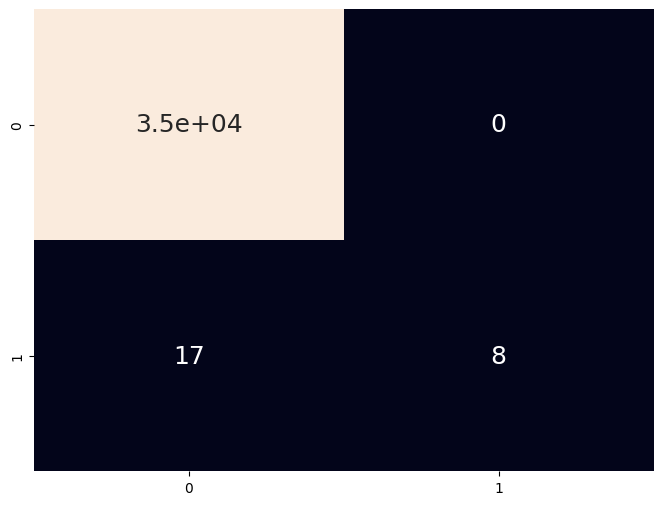

In [96]:
from sklearn.metrics import confusion_matrix 
import seaborn as sns
import matplotlib.pyplot as plt 

plt.figure(figsize=(8,6))
cm = confusion_matrix(yTest, model.predict(xTest))
sns.heatmap(cm, annot=True, annot_kws={"fontsize":18}, cbar=False)
plt.show()